# Ford GoBike Data Analysis and Visualization
## by Nada Ahmed



## Preliminary Wrangling

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in february 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#import dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#display dataset for exploration
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


factors that could lead to interesting relationships: distance covered, gender, age, user type, time to cover specific distance, popular routes,

In [4]:
#print dataset dimensions to know number of observations and features
bike_df.shape

(183412, 16)

In [5]:
# check for unique values in each feature
bike_df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
#check for duplicated values in all the dataset
bike_df.duplicated().sum()

0

In [7]:
#check for null values in each feature
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#print each feature infromation including datatype and number of non-null observations
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
#make a copy of the original dataset to use in warngling and cleaning process
bike_df_copy = bike_df.copy()

In [10]:
# delete null values
bike_df_copy.dropna(inplace = True)

In [11]:
#change station ids to integer datatype
bike_df_copy['start_station_id']=bike_df_copy['start_station_id'].astype(int)
bike_df_copy['end_station_id']=bike_df_copy['end_station_id'].astype(int)

In [12]:
#make a start_date and end_date columns which contain the start date in year-month-day format
bike_df_copy['start_date'] = pd.to_datetime(pd.to_datetime(bike_df_copy['start_time']).dt.date, format='%Y-%m-%d')
bike_df_copy['end_date'] = pd.to_datetime(pd.to_datetime(bike_df_copy['end_time']).dt.date, format='%Y-%m-%d')
#make a start_time and end_time columns which contain the start and end time in hours and minutes
bike_df_copy['start_time'] = pd.to_datetime(bike_df_copy['start_time']).dt.time
bike_df_copy['end_time'] = pd.to_datetime(bike_df_copy['end_time']).dt.time

In [13]:
# make a column that contains the day of the start of the trip
bike_df_copy['start_day'] = bike_df_copy['start_date'].apply(lambda r:r.day).astype(int)

In [14]:
#make columns that contain the trip duration in minutes and in hours
bike_df_copy['duration_min']=(bike_df_copy['duration_sec']/60).astype(float)
bike_df_copy['duration_hour']=(bike_df_copy['duration_sec']/3600).astype(float)

In [15]:
#make a column that contains the users' age.
bike_df_copy['age'] = (2019 - bike_df_copy['member_birth_year']).astype(int)

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 features. There are 7 object type features (start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip), and 9 numeric features(duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year).


### What is/are the main feature(s) of interest in your dataset?

> There are three main questions the investigation aims to answer:

>    1. Average trip times.
    
>    2. Most popular trip stations.
    
>    3. Effect of user type on average trip times.
    
>    4. Effect of age on average trip times.
    
>    5. Effect of gender on average trip times.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> age, gender, duration (in minutes and seconds), user type, start station name, start time.

## Univariate Exploration

#### Most popular trip stations

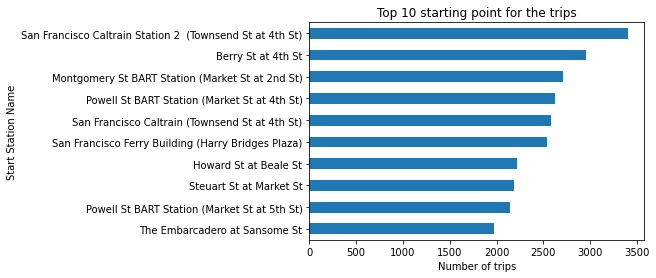

In [16]:
# extract top 10 most frequent start station names and graph them in a horizontal bar graph
top_names = bike_df_copy.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh')
plt.title('Top 10 starting point for the trips')
plt.xlabel('Number of trips')
plt.ylabel('Start Station Name');

by plotting the top 10 starting stations for trips we can see that San Francisco Caltrain Station 2 is the most popular station at near 3500 trips in february.

#### Age distribution

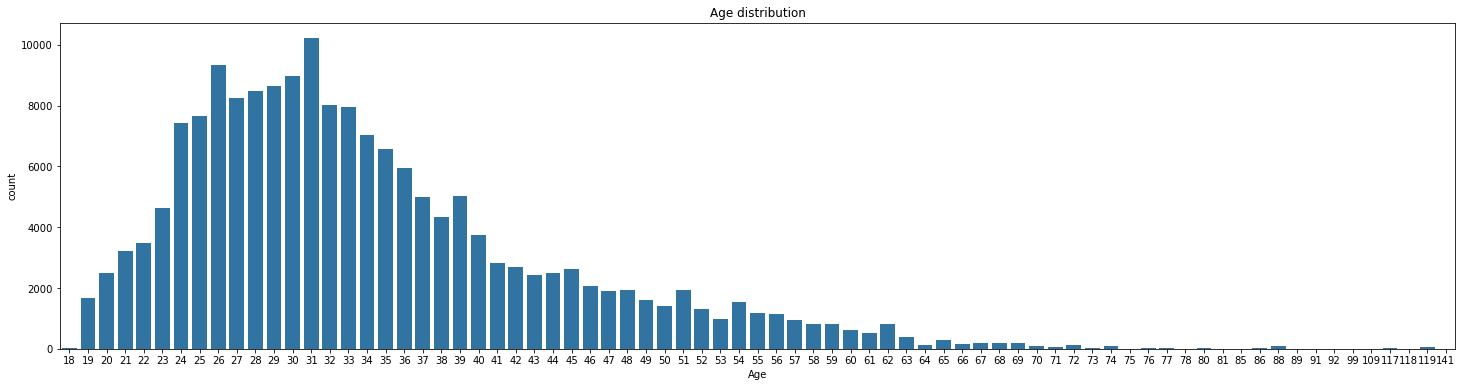

In [17]:
plt.figure(figsize=(25,6))
sns.countplot(bike_df_copy['age'], color = sns.color_palette()[0]);
plt.xlabel('Age');
plt.title('Age distribution');

From this plot we can see that most users are between 20 to 40 years with the most common ages being 26 and 31.

#### Gender Counts Distribution 

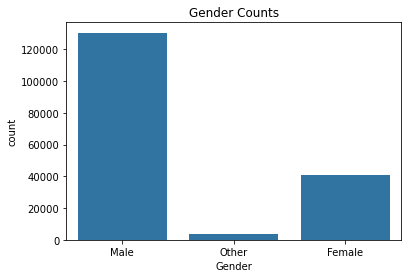

In [18]:
sns.countplot(bike_df_copy['member_gender'], color = sns.color_palette()[0]);
plt.xlabel('Gender');
plt.title('Gender Counts');

From the above histogram we can observe that most of the riders are males.

#### User Types (Customer vs Subscriber)

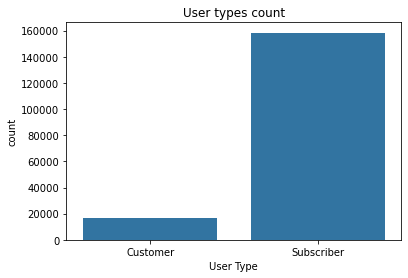

In [19]:
sns.countplot(bike_df_copy['user_type'], color = sns.color_palette()[0]);
plt.xlabel('User Type');
plt.title('User types count');

From the above histogram we can observe that most of the users are Subscribers.

#### Average trip duration

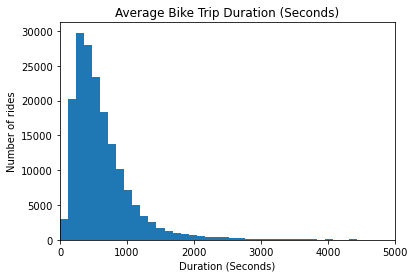

In [20]:
bins = np.arange(0, bike_df_copy['duration_sec'].max() +1000 , 120)
plt.hist(data = bike_df_copy , x = 'duration_sec' , bins = bins)
plt.xlim(0,5000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');
plt.ylabel('Number of rides');

In this histogram, the duration is plotted in seconds. We can see that most trips (about 30000) are about 500 to 600 seconds. 

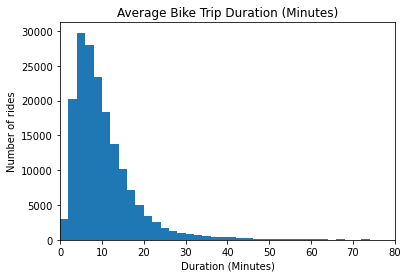

In [21]:
bins = np.arange(0, bike_df_copy['duration_min'].max() +1 , 2)
plt.hist(data = bike_df_copy , x = 'duration_min' , bins = bins)
plt.xlim(0,80)
plt.title('Average Bike Trip Duration (Minutes)')
plt.xlabel('Duration (Minutes)');
plt.ylabel('Number of rides');

In this histogram, the duration is plotted in minutes for better understanding of the graph. We can observe that most trips are under 10 minutes with a peak at about 8 minutes.

#### Average rides per day

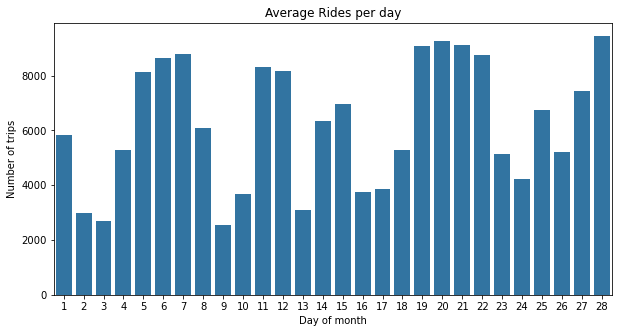

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=bike_df_copy,x='start_day', color=sns.color_palette()[0])
plt.xlabel('Day of month');
plt.ylabel('Number of trips');
plt.title('Average Rides per day');

From this plot we can see that the last day of the month is the most crowded one. There is no apparent reason for this as it could be as a result of range of reasons like weekend, national vacation,.. etc. Therefore, we cannot draw any conclusions from this plot.

## Bivariate Exploration

#### Effect of age on trip duration

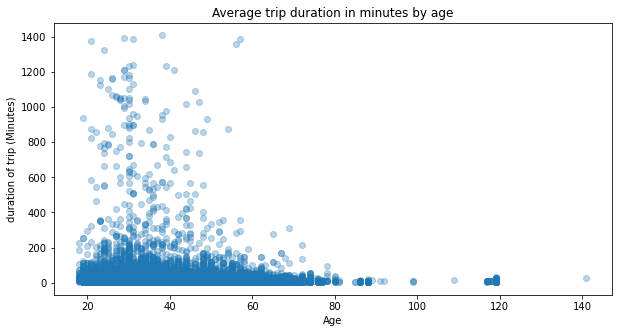

In [23]:
plt.figure(figsize=(10,5))
plt.scatter((bike_df_copy['age']), bike_df_copy['duration_min'], alpha = 0.30 );
plt.xlabel('Age');
plt.ylabel('duration of trip (Minutes)');
plt.title('Average trip duration in minutes by age');

From plotting Age againist trip duration in minutes we can see that users between 20 and 40 years have the longest rides with the younger members having consistently more long trips.

#### Effect of gender on trip duration

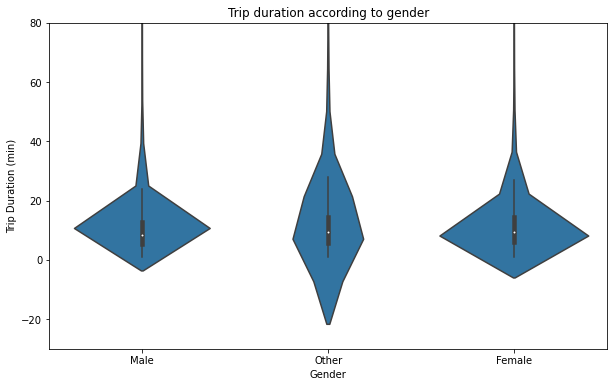

In [76]:
plt.figure(figsize = [10, 6])
sns.violinplot(data=bike_df_copy, x='member_gender', y='duration_min', color=sns.color_palette()[0], innner=None)
plt.ylim([-30, 80]);
plt.xlabel('Gender');
plt.ylabel('Trip Duration (min)');
plt.title('Trip duration according to gender');

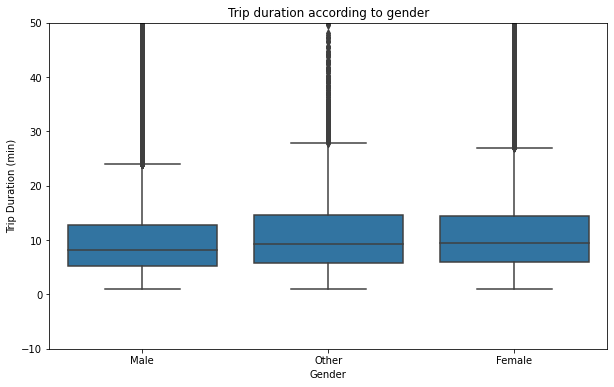

In [67]:
plt.figure(figsize = [10, 6])
sns.boxplot(data = bike_df_copy, x = 'member_gender', y = 'duration_min', color = sns.color_palette()[0])
plt.ylim([-10, 50])
plt.xlabel('Gender')
plt.ylabel('Trip Duration (min)')
plt.title('Trip duration according to gender');

From the above plots we can observe an interesting fact. Although the number of male riders is more than that of females and others, females and others tend to have longer trip durations on average.

#### Effect of user type on trip duration

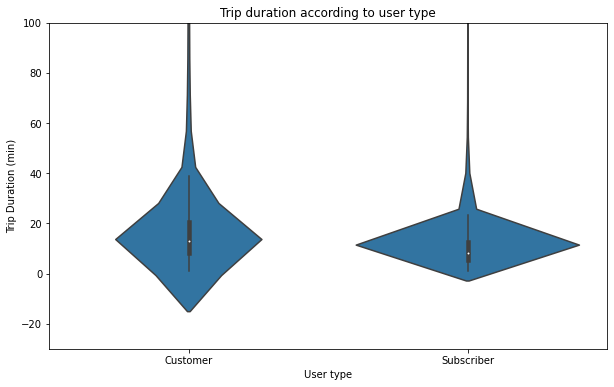

In [77]:
plt.figure(figsize = [10, 6])
sns.violinplot(data=bike_df_copy, x='user_type', y='duration_min', color=sns.color_palette()[0], innner=None)
plt.ylim([-30, 100]);
plt.xlabel('User type')
plt.ylabel('Trip Duration (min)')
plt.title('Trip duration according to user type');

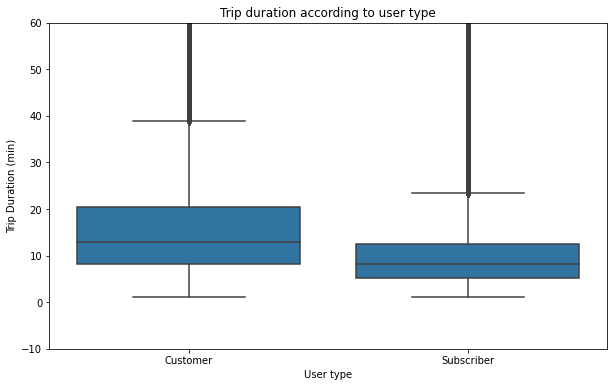

In [69]:
plt.figure(figsize = [10, 6])
sns.boxplot(data = bike_df_copy, x = 'user_type', y = 'duration_min', color = sns.color_palette()[0])
plt.ylim([-10, 60])
plt.xlabel('User type')
plt.ylabel('Trip Duration (min)')
plt.title('Trip duration according to user type');

From the above plots we can observe that although the number of subscribers is much higher than that of customers, customers tend to have much longer trips than subscribers.

## Multivariate Exploration


#### Effect on age and gender on trip duration

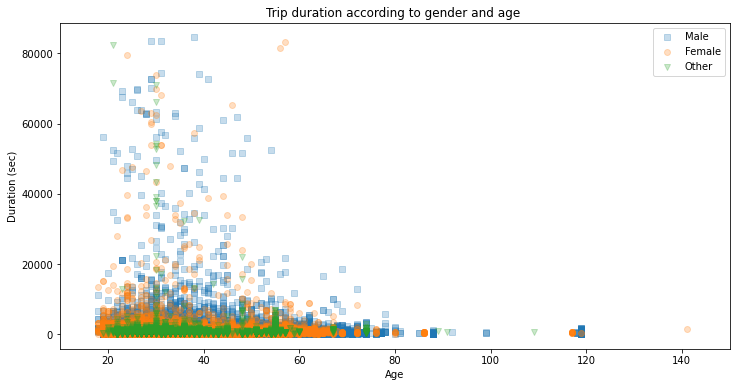

In [29]:
#make markers to differentiate males, females, and others
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]
plt.figure(figsize=(12,6))
#plot age with duration in seconds for each gender and mark them with the marker above then combine the three graphs in one graph
for gender, marker in gender_markers:
    df_gender = bike_df_copy[bike_df_copy['member_gender'] == gender]
    plt.scatter((df_gender['age']), df_gender['duration_sec'], marker = marker, alpha=0.25)

plt.legend(['Male','Female','Other'])
plt.xlim(10,150)
plt.xlabel('Age')
plt.ylabel('Duration (sec)');
plt.title('Trip duration according to gender and age ');

After plotting age,gender, and duration together, we can see that the graph doesn't provide new information and there isn't any trends tying age, gender, and duration together.